# Performing Principle Component Analysis

### Import data

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [93]:
dataset = pd.read_csv('../dataset/AUS_10K_RAW.csv', index_col=0)
train, test = train_test_split(dataset, test_size=0.25, random_state=42)

In [94]:
train.to_csv('split_data/AUS_10K_RAW_train.csv', sep=',', encoding='utf-8')
test.to_csv('split_data/AUS_10K_RAW_test.csv', sep=',', encoding='utf-8')

In [95]:
label = train['DEP_DELAY']
train_data = train.drop('DEP_DELAY', axis=1)
test_data = test.drop('DEP_DELAY', axis=1)

In [96]:
scale = StandardScaler()
scaled_data_train = scale.fit_transform(train_data)
scaled_data_test = scale.transform(test_data)

In [97]:
print(type(scaled_data_train))

<class 'numpy.ndarray'>


### Perform PCA

In [98]:
pca = PCA()
X_train_pca = pca.fit_transform(scaled_data_train)
X_test_pca = pca.transform(scaled_data_test)

In [99]:
explained_variance = pca.explained_variance_ratio_

In [100]:
print(explained_variance)

[2.15604625e-01 1.72550439e-01 1.31102866e-01 4.78644009e-02
 4.51383840e-02 4.46379243e-02 4.32724789e-02 4.28694005e-02
 4.07003503e-02 4.02683993e-02 3.75840788e-02 3.33989373e-02
 3.22800819e-02 2.87770130e-02 1.28664350e-02 1.06907076e-02
 8.52999030e-03 5.68715189e-03 2.58521987e-03 1.65045985e-03
 9.83475066e-04 5.20990963e-04 3.12349972e-04 1.23840271e-04
 6.37619782e-36]


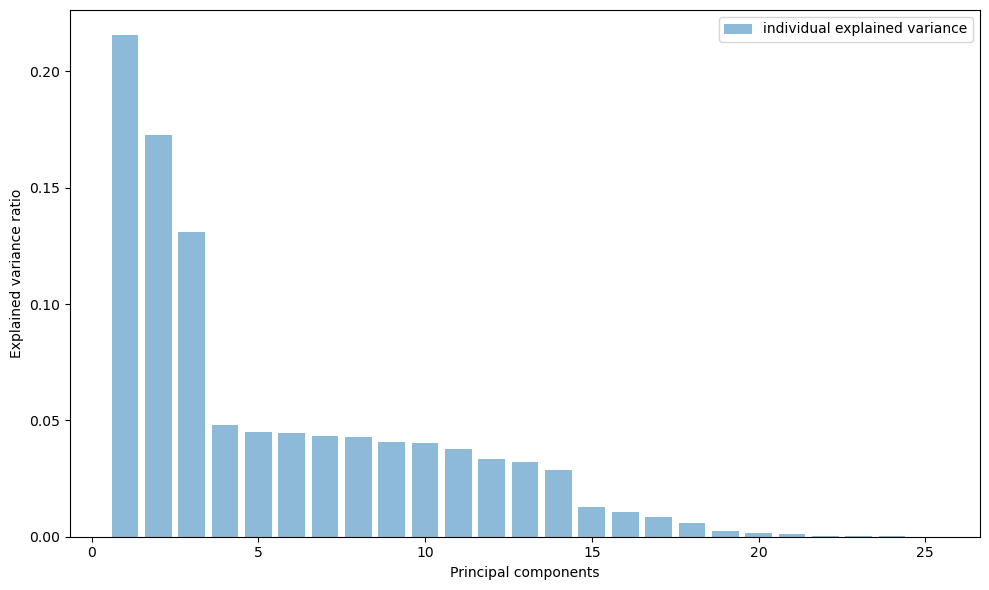

In [102]:
# plot the variance as a function of the number of principal components
plt.figure(figsize=(10, 6))
plt.bar(range(1, 26), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('explained_variance/AUS_10K_RAW_pca_variance.png')
plt.show()

In [103]:
pd.DataFrame(X_train_pca).to_csv('pca_data/AUS_10K_RAW_X_train_pca.csv', sep=',', encoding='utf-8')
pd.DataFrame(X_test_pca).to_csv('pca_data/AUS_10K_RAW_X_test_pca.csv', sep=',', encoding='utf-8')